In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [8]:
mnist = tf.keras.datasets.mnist  # Load the data

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0  # Normalizing the data for it be in the range 0 to 1
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
#Build the Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),   # Flattens the input of 60000 x 28 x 28 shape into 47,040,000
    tf.keras.layers.Dense(128,activation='relu'),   
    tf.keras.layers.Dropout(0.2),                   #Dropout with 20% probability is set
    tf.keras.layers.Dense(10,activation='softmax')  #Softmax activation selected because the output is of multi-class type
])

In [10]:
#Compile the model

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
#Train the model

r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.9144 - val_loss: 0.1371 - val_accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9581 - val_loss: 0.0982 - val_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1062 - accuracy: 0.9677 - val_loss: 0.0868 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0866 - accuracy: 0.9736 - val_loss: 0.0731 - val_accuracy: 0.9769
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0751 - accuracy: 0.9769 - val_loss: 0.0790 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0639 - accuracy: 0.9795 - val_loss: 0.0698 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0596 - accuracy: 0.9807 - val_loss: 0.0708 - val_accuracy:

In [23]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

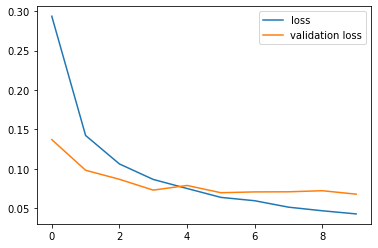

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation loss')
plt.legend()

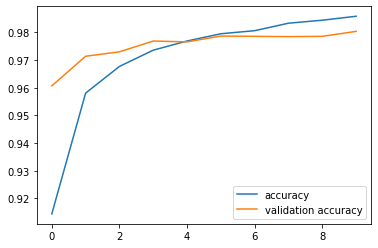

In [20]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.legend()

In [24]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 730us/step - loss: 0.0679 - accuracy: 0.9804
[0.06794688105583191, 0.980400025844574]


Confusion matrix, without normalization
[[ 967    0    2    1    0    1    5    1    3    0]
 [   0 1126    3    1    0    0    2    0    3    0]
 [   2    0 1013    1    2    1    2    7    4    0]
 [   0    0    7  991    0    5    0    5    2    0]
 [   0    0    3    0  964    0    6    2    1    6]
 [   1    0    0    8    0  873    4    1    4    1]
 [   2    2    0    1    1    3  949    0    0    0]
 [   1    1    6    8    0    0    0 1009    0    3]
 [   2    1    3    9    3    4    3    4  942    3]
 [   2    4    0    8    9    4    0    9    3  970]]


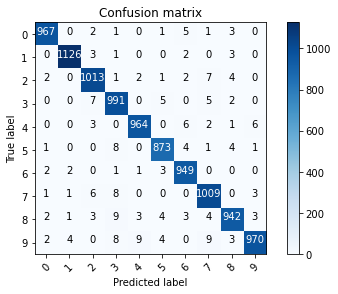

In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    '''This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    '''
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh=cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j]>thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 2 Predicted: 4')

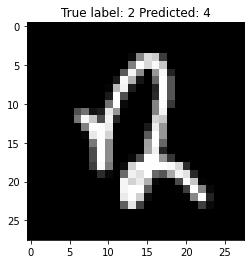

In [33]:
#Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s Predicted: %s' % (y_test[i],p_test[i]))